In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd
from collections import OrderedDict
from manifold_helper import ManifoldHelper


rng = np.random.default_rng(seed=42)

def plot_images(data, n_img_per_row=10, cmap='gray'):
    shape = int(np.sqrt(len(data[0])))
    # plot iage of the digits
    img = np.zeros( (shape * n_img_per_row, shape * n_img_per_row) )
    for i in range( n_img_per_row ):
        ix = shape * i
        for j in range( n_img_per_row ):
            iy = shape * j
            img[ix:ix + shape, iy:iy + shape] = data[i * n_img_per_row + j].reshape( (shape, shape) )

    plt.figure(figsize=(15, 15))
    plt.imshow( img, cmap=cmap )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.show()

In [2]:
n_class = 10 # n primeiros digitos
class_percent = 0.1 # porcentagem dos dados de cada classa que serão usados
rescale_factor = 1.0
is_invert = False
neighbors = [3, 4, 5, 8, 10]
dimensions = [2, 3]
methods = ['ISOMAP', 'LLE', 'SE', 'LTSA']

# Carregando os dados

In [3]:
datasetOriginal = pd.read_csv("data/mnist_train.csv")
df = datasetOriginal.copy()
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# separar os rotulos dos dados
label, x = df.iloc[:, :1], df.iloc[:, 1:]
label = label.to_numpy().transpose()[0]
x = x.to_numpy()
label, x

(array([5, 0, 4, ..., 5, 6, 8]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [5]:
# sort de acordo com os labels
idx = np.argsort(label)
label = label[idx]
x = x[idx]
label, x

(array([0, 0, 0, ..., 9, 9, 9]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [6]:
unique, counts = np.unique(label, return_counts=True)
num_data = dict(zip(unique, counts))
num_data

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

## Selecionando dados para analise

In [7]:
# selecionando apenas parte dos dados
x_cut = np.empty((0, 784))
label_cut = np.empty((1, 0), dtype=np.uint8)
for i in range(n_class):
    if i > 0:
        start = sum([num_data[j] for j in range(i)])
        end = int(num_data[i] * class_percent) + start
    else:
        start = 0
        end = int(num_data[i] * class_percent)
    label_cut = np.append(label_cut, label[start : end])
    x_cut = np.vstack((x_cut, x[start : end, :]))

unique, counts = np.unique(label_cut, return_counts=True)
num_data_cut = dict(zip(unique, counts))
num_data_cut

{0: 592,
 1: 674,
 2: 595,
 3: 613,
 4: 584,
 5: 542,
 6: 591,
 7: 626,
 8: 585,
 9: 594}

In [8]:
idx = np.random.RandomState(seed=42).permutation(len(x_cut))
x_cut = x_cut[idx, :]
label_cut = label_cut[idx]

In [9]:
label_colors = [list( mcolors.TABLEAU_COLORS )[i] for i in range( 10 )]
colors = [label_colors[v] for v in label_cut]

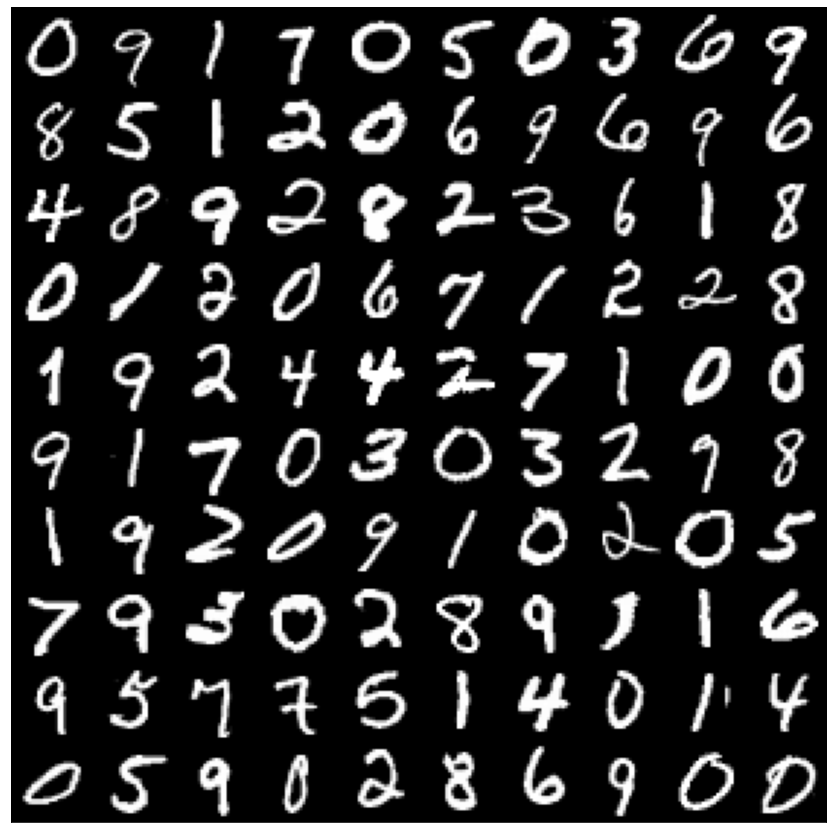

In [10]:
plot_images(x_cut)

# preprocessing

# ARI

In [11]:
data = x_cut

Gerando os métodos para cada valor de vizinhos no intervalo

In [12]:
manifold = ManifoldHelper(neighbors, dimensions, methods, megaman=False, alternative_LTSA=True)

Using alternative LTSA.
Using sklean manifold methods.


In [ ]:
ari_results = manifold.evaluate_all(data, label_cut, n_components=n_class)


2_dimension:
   3_neighbors: 0.34(17s)  0.38(2.1s) 

/home/marco/anaconda3/envs/manifold/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


 -0.00(1.8s) 

/home/marco/anaconda3/envs/manifold/lib/python3.9/site-packages/ltsa/_local_tangent_space_alignment.py:241: ComplexWarning: Casting complex values to real discards the imaginary part
  l[i, :, :] = ti.dot(np.eye(self.k, self.k) - np.ones((self.k, self.k))/self.k).dot(self._theta_pinv[i, :, :])


 0.00(-1s) 
   4_neighbors: 0.24(18s)  0.33(2.6s)  0.34(1.9s) 

/home/marco/anaconda3/envs/manifold/lib/python3.9/site-packages/ltsa/_local_tangent_space_alignment.py:241: ComplexWarning: Casting complex values to real discards the imaginary part
  l[i, :, :] = ti.dot(np.eye(self.k, self.k) - np.ones((self.k, self.k))/self.k).dot(self._theta_pinv[i, :, :])


 0.00(-1s) 
   5_neighbors: 0.25(19s)  0.35(3.6s)  0.31(2.3s) 

In [ ]:
manifold.plot_ari_results(ari_results)

In [ ]:
from megaman.geometry import Geometry
from megaman.embedding import SpectralEmbedding

radius = 0.5
adjacency_method = 'cyflann'
adjacency_kwds = {'radius':radius}
affinity_method = 'gaussian'
affinity_kwds = {'radius':radius}
laplacian_method = 'symmetricnormalized'
laplacian_kwds = {'scaling_epps':radius}


geom = Geometry(adjacency_method=adjacency_method, adjacency_kwds=adjacency_kwds,
                affinity_method=affinity_method, affinity_kwds=affinity_kwds,
                laplacian_method=laplacian_method, laplacian_kwds=laplacian_kwds)

In [ ]:
spectral = SpectralEmbedding(n_components=3, eigen_solver='amg', geom=geom, drop_first=False)
embed_spectral = spectral.fit_transform(x_cut)

In [ ]:


embed_spectral = embed_spectral[:, [0, 2]] * 50.0
tmp = embed_spectral[:, 1].copy()
embed_spectral[:,1] = embed_spectral[:,0].copy()
embed_spectral[:,0] = tmp.copy()
tmp = None



In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(embed_spectral[:, 0], embed_spectral[:, 1], s=1, c=colors)